# Analysis of Lake Water Quality Measurements

This notebook parses and visualizes water quality data collected by past Environmental Science classes at Lakeshore High School.

## Parse Data

We start by parsing the data into Python.

In [1]:
# We will use the Pandas library to read the data from the Google Sheet
import pandas as pd
url = 'https://docs.google.com/spreadsheets/d/1Y_7_AertX2dd86mXmVtc5ju-sbccSAGZYByXZrDT9sw/export?gid=0&format=csv'
data = pd.read_csv(url)

In [2]:
# Next, let's print the first 20 rows of the data
data.head(20)

,Year,Lake,Class Hour,Temperature (°C),Conductivity (μS),pH,Alkalinity (ppm),Dissolved Oxygen (ppm),Copper (mg/L),Iron (mg/L),Total Hardness (ppm),Nitrate (mg/L),Nitrite (mg/L),Total Chlorine (ppm),Phosphate (ppm),Turbidity (NTUs)
0,2020,Lake Michigan,2nd,19.5,0.25,6.5,80,4.0,0.10,0,120,0,0,0.1,0.1,NaN
1,2021,Lake Michigan,2nd,16.9,0.32,7.0,120,8.5,0.10,0,180,0,0,0.0,0.2,NaN
2,2021,Lake Michigan,3rd,18.0,0.32,7.0,120,8.5,0.10,0,120,0,0,0.1,0.2,NaN
3,2022,Lake Michigan,3rd,22.8,0.00,7.5,120,8.5,0.00,0,120,0,0,0.1,NaN,13.0
4,2022,Lake Michigan,6th,23.9,0.33,7.5,120,8.5,0.00,0,50,0,0,0.0,NaN,10.0
5,2023,Lake Michigan,2nd,21.4,0.30,7.0,240,7.0,0.00,0,120,0,0,0.3,0.0,6.0
6,2023,Lake Michigan,6th,22.7,0.27,7.5,240,10.0,0.00,0,120,0,0,0.1,0.0,6.0
7,2020,North Lake,2nd,17.9,0.50,6.5,120,6.0,0.10,0,120,0,0,0.0,0.1,NaN
8,2021,North Lake,2nd,17.6,0.46,8.0,180,10.0,0.10,0,250,0,0,0.1,0.2,NaN
9,2021,North Lake,3rd,19.0,0.45,7.5,180,10.0,0.10,0,180,0,0,0.1,0.2,NaN


## Visualize Data

Next, we will plot the data using different symbols for the two lakes. We will make one plot per quantity.

In [3]:
# We will use the Matplotlib library to plot the data
import matplotlib.pyplot as plt

# The following code sets default font sizes and styles for the plots
# Modified from https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('lines', linewidth=3)

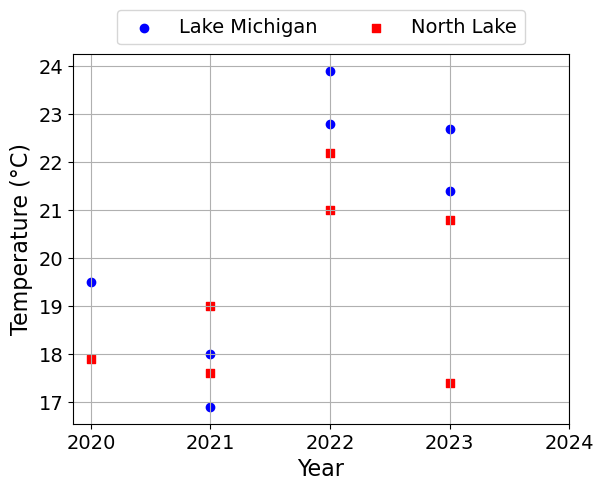

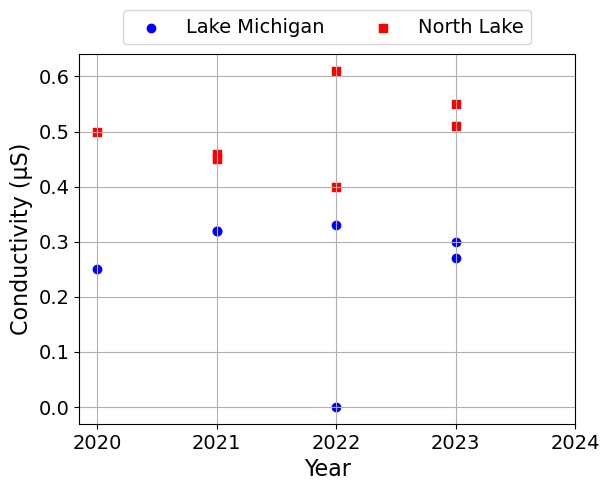

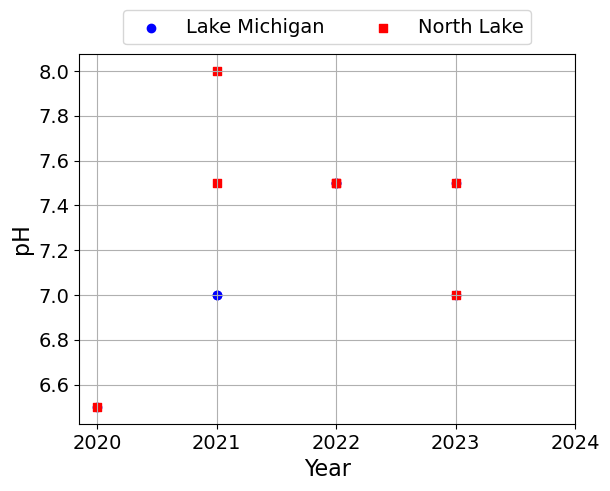

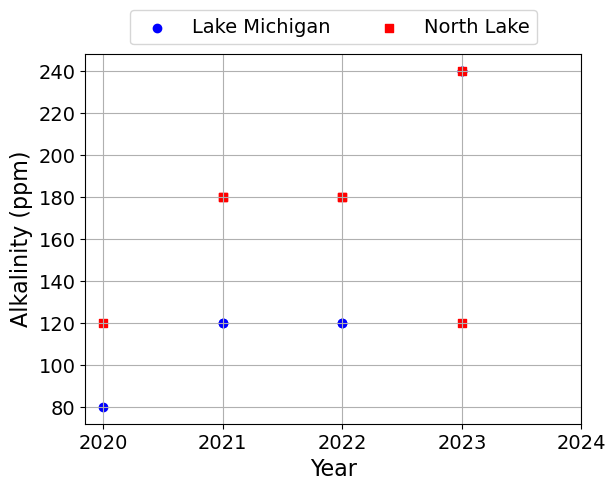

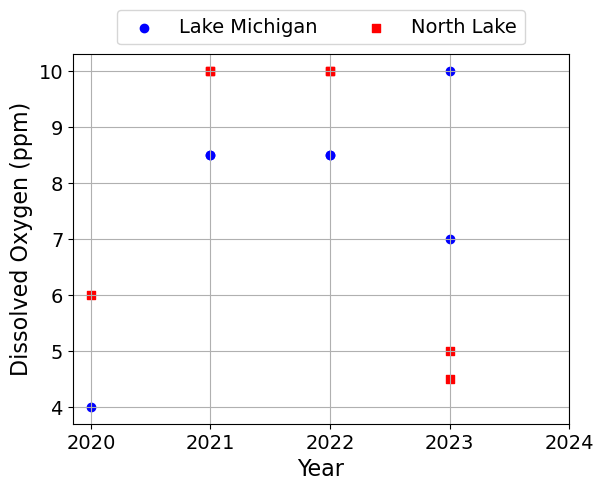

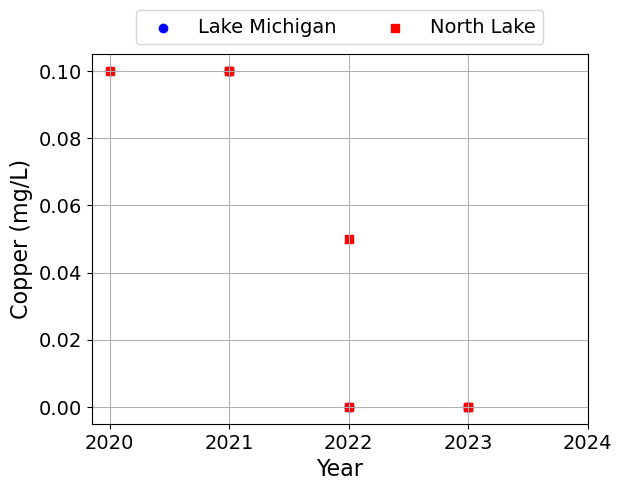

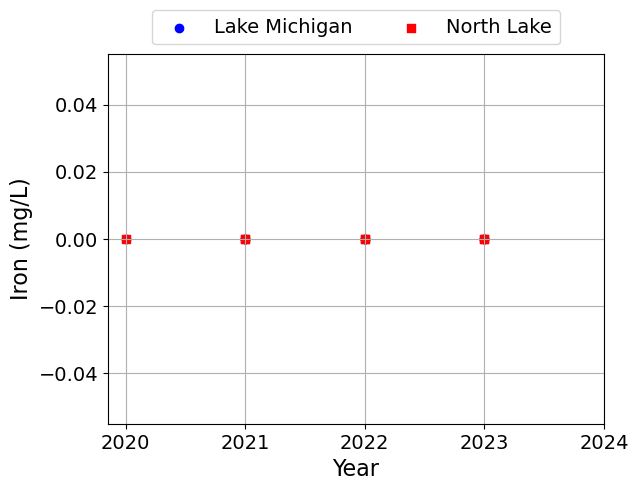

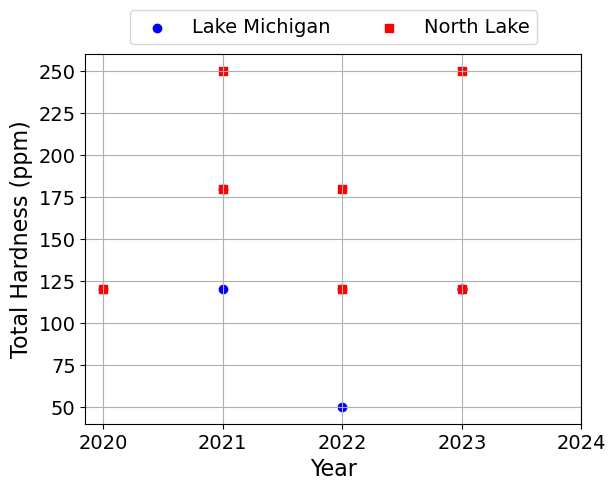

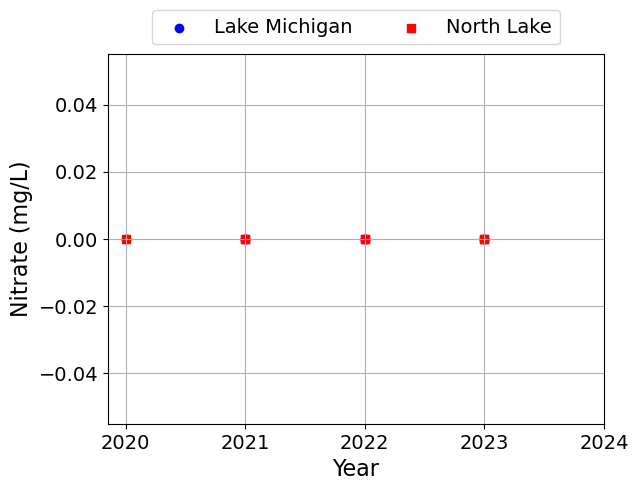

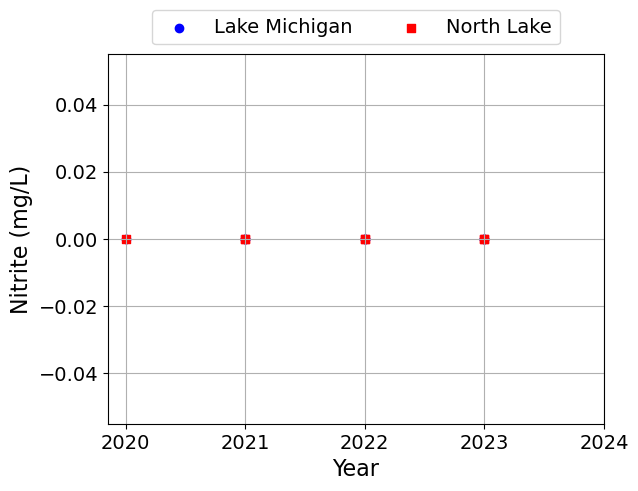

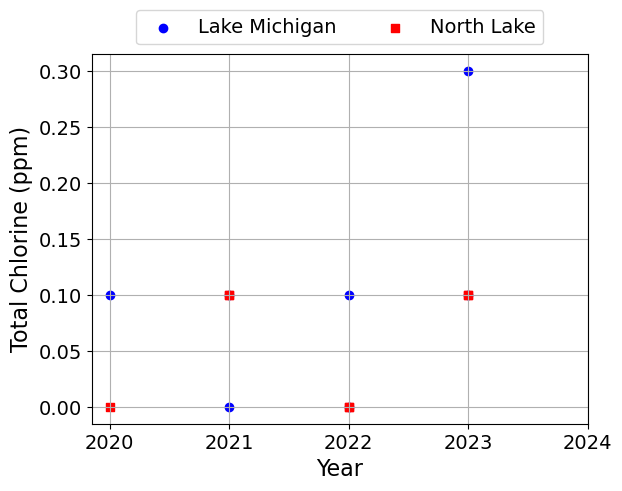

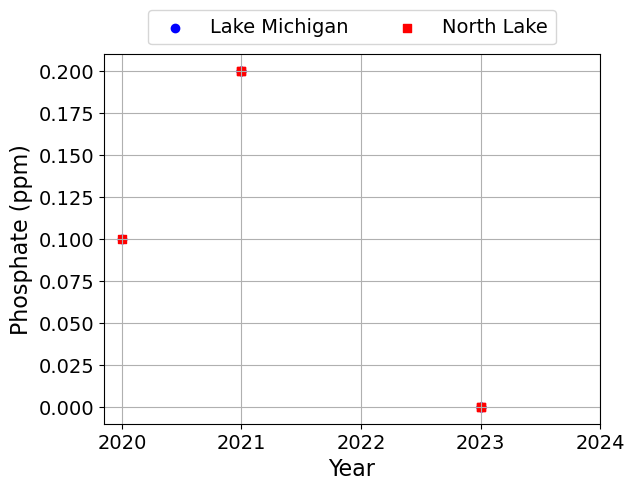

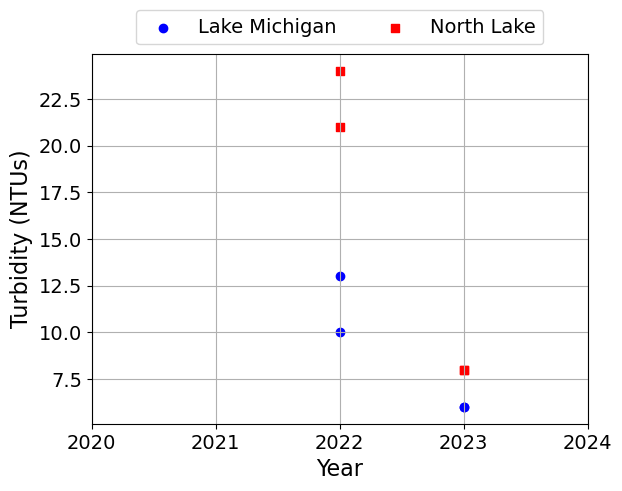

In [4]:
# Define the two lakes we are interested in
lakes = ['Lake Michigan', 'North Lake']

symbols = ['o', 's']
colors = ['blue', 'red']

# Get the names of the columns we want to plot
columns = data.columns[3:]

# Loop over the columns
for i, c in enumerate(columns):

    # Loop over the lakes
    for j, l in enumerate(lakes):
        # Get the data for the current lake
        df = data[data['Lake'] == l]

        # Plot the data as a scatter plot
        plt.scatter(df['Year'], df[c], label=l, marker=symbols[j], color=colors[j])

    # Add an extra year to the x-axis to allow students to plot their new data
    years = list(df['Year'].unique())
    years.append(max(years) + 1)
    plt.xticks(years)

    # Add labels and legend
    plt.xlabel('Year')
    plt.ylabel(c)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=2)
    plt.grid()
    plt.show()

## Linear Relationships

Next, we will look for linear relationships in the data:
* Positive correlation between conductivity and disolved oxygen
* Possible positive correlation between conductivity and alkalinity
* Visualize these (possible) correlations with linear regression

First we will start by plotting the data. You always want to start any data analysis with visual inspections.

In [5]:
def scatter_plot(x, y, seperate_lakes=False):
    """ Create a scatter plot for two columns in the dataset

    Arguments:
        x: the name of the column to plot on the x-axis
        y: the name of the column to plot on the y-axis
    """

    def finalize_plot():
        plt.xlabel(x)
        plt.ylabel(y)
        plt.grid()
        plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=2)
        plt.show()

    for j,l in enumerate(lakes):
        df = data[data['Lake'] == l]
        plt.scatter(df[x], df[y], label=l, marker=symbols[j], color=colors[j])
        if seperate_lakes:
            finalize_plot()

    if not seperate_lakes:
        finalize_plot()

### Dissolved Oxygen and Conductivity

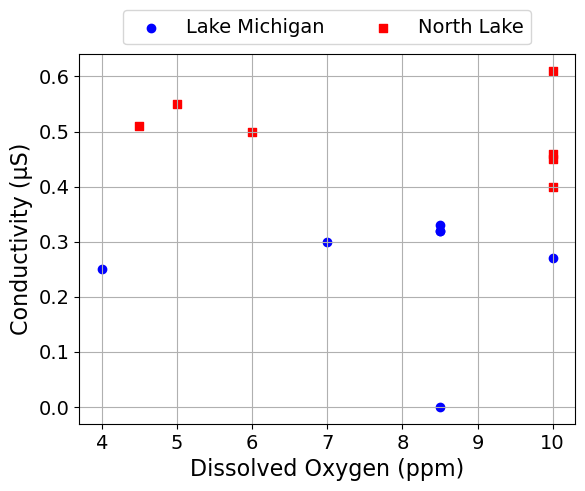

In [6]:
scatter_plot('Dissolved Oxygen (ppm)', 'Conductivity (μS)')

We can also make seperate plots for each lake.

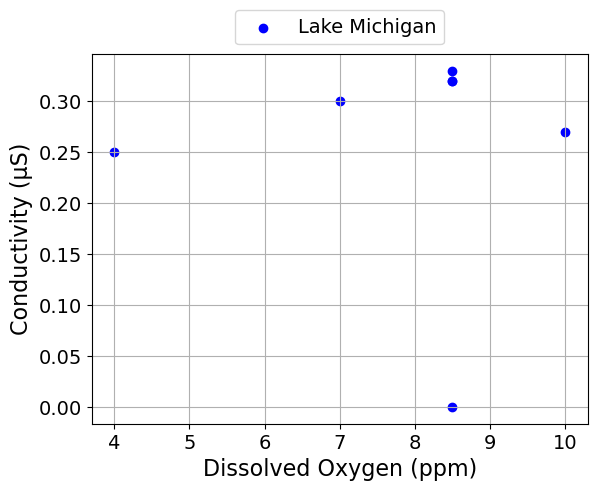

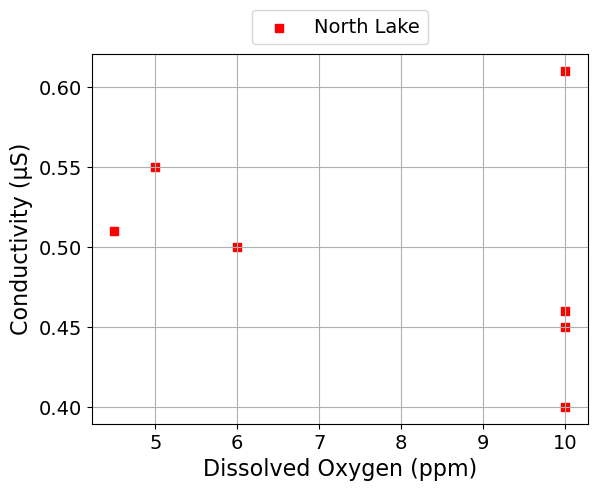

In [7]:
scatter_plot('Dissolved Oxygen (ppm)', 'Conductivity (μS)', seperate_lakes=True)

### Alkalinity and Conductivity

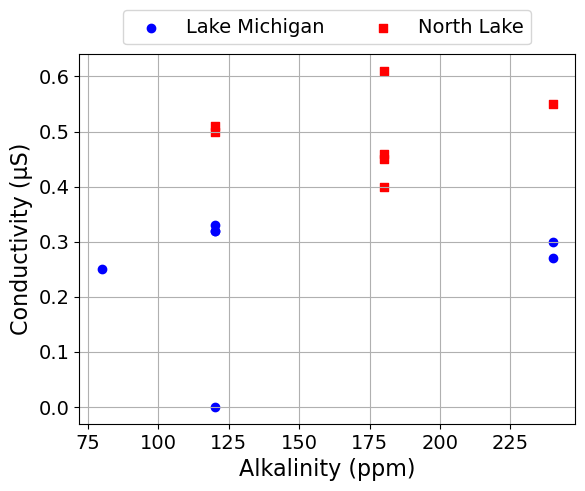

In [8]:
scatter_plot('Alkalinity (ppm)', 'Conductivity (μS)')

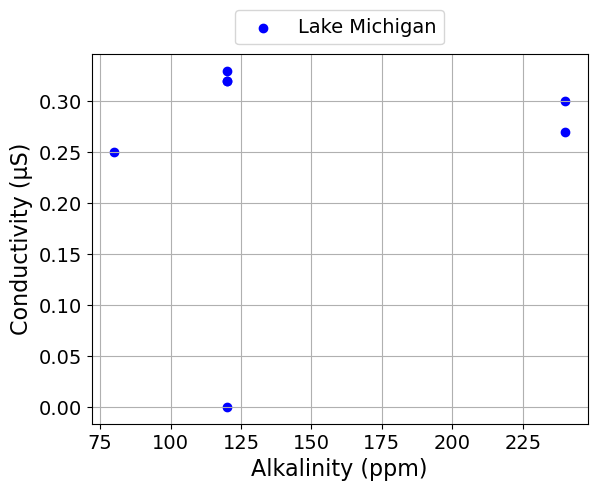

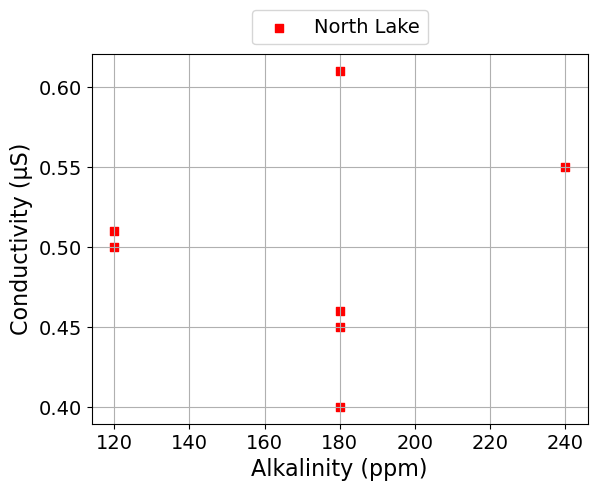

In [9]:
scatter_plot('Alkalinity (ppm)', 'Conductivity (μS)', seperate_lakes=True)

### Alkalinity and Total Hardness

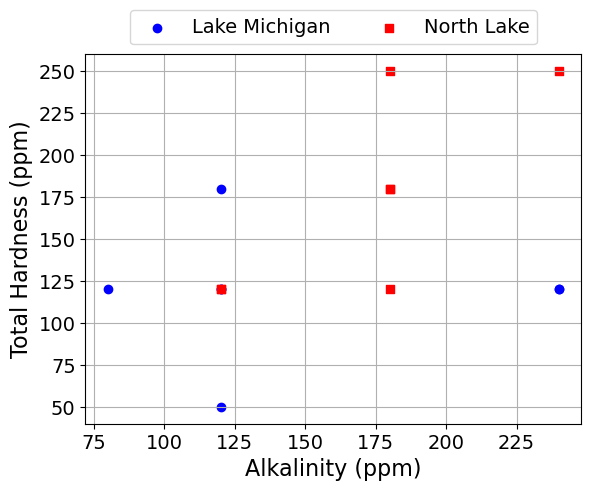

In [10]:
scatter_plot('Alkalinity (ppm)', 'Total Hardness (ppm)')

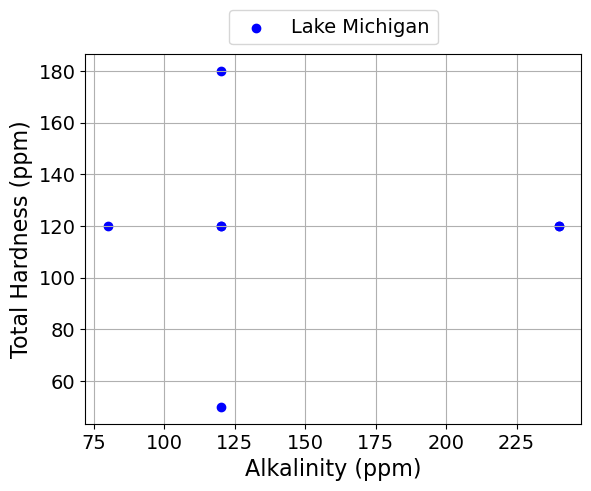

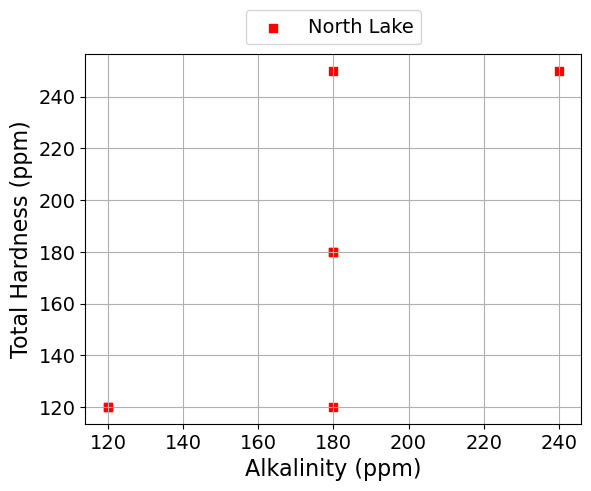

In [11]:
scatter_plot('Alkalinity (ppm)', 'Total Hardness (ppm)', seperate_lakes=True)

## Linear Regression

Next, we will calculate the best fit line and correlation coefficient.

In [12]:
# We will use scipy.stats to calculate the linear regression
import scipy.stats as stats

def scatter_plot_with_linear_regression(x, y):
    """ Create a scatter plot with linear regression
    for two columns in the dataset

    Arguments:
        x: the name of the column to plot on the x-axis
        y: the name of the column to plot on the y-axis
    """

    # Select the data for the x and y columns
    x_data = data[x].values
    y_data = data[y].values

    # Perform linear regression
    b1, b0, r_value, p_value, std_err = stats.linregress(x_data, y_data)

    print("slope =", round(b1,3), x, "/", y)
    print("intercept =", round(b0,2), y)
    print("r =", round(r_value,2))
    
    # Plot the raw data
    for j,l in enumerate(lakes):
        df = data[data['Lake'] == l]
        plt.scatter(df[x], df[y], label=l, marker=symbols[j], color=colors[j])

    # Plot the linear regression line
    plt.plot(x_data, b0 + b1 * x_data, color='black', label='Best Fit Line')

    # Plot the mean values of x and y
    # By definition, the regression line passes through the mean values of x and y
    x_mean = x_data.mean()
    y_mean = y_data.mean()
    plt.plot(x_mean, y_mean, marker='d', color='black', linestyle='', label='Mean (Average) Values')

    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Both Lakes")
    plt.show()

def scatter_plot_with_linear_regression_by_lake(x, y):
    """ Create a scatter plot with linear regression
    for two columns in the dataset by lake

    Arguments:
        x: the name of the column to plot on the x-axis
        y: the name of the column to plot on the y-axis
    """

    # Loop over the lakes
    for j,l in enumerate(lakes):
        # Get the data for the current lake
        df = data[data['Lake'] == l]

        # Select the data for the x and y columns
        x_data = df[x].values
        y_data = df[y].values

        # Plot the data
        plt.scatter(x_data, y_data, label=l, marker=symbols[j], color=colors[j])

        # Perform linear regression
        b1, b0, r_value, p_value, std_err = stats.linregress(x_data, y_data)

        print(" *** ", l, " ***")
        print("slope =", round(b1,3), x, "/", y)
        print("intercept =", round(b0,2), y)
        print("r =", round(r_value,2))
        print(" ")
    
        # Plot the linear regression line
        plt.plot(x_data, b0 + b1 * x_data, color='black', label='Best Fit Line')

        # Plot the mean values of x and y
        # By definition, the regression line passes through the mean values of x and y
        x_mean = x_data.mean()
        y_mean = y_data.mean()
        plt.plot(x_mean, y_mean, marker='d', color='black', linestyle='', label='Mean (Average) Values')

        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
        plt.grid()
        plt.title(l)
        plt.show()



### Dissolved Oxygen and Conductivity

slope = -0.005 Dissolved Oxygen (ppm) / Conductivity (μS)
intercept = 0.41 Conductivity (μS)
r = -0.07


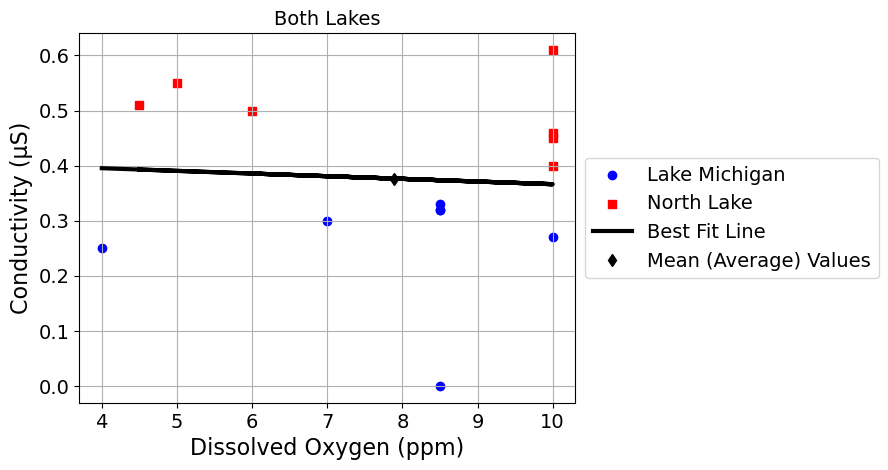

In [13]:
scatter_plot_with_linear_regression('Dissolved Oxygen (ppm)', 'Conductivity (μS)')

 ***  Lake Michigan  ***
slope = -0.001 Dissolved Oxygen (ppm) / Conductivity (μS)
intercept = 0.26 Conductivity (μS)
r = -0.01
 


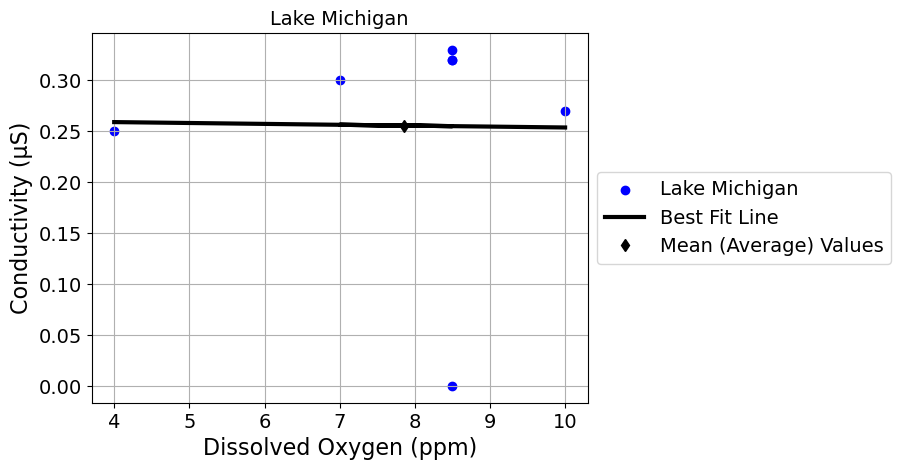

 ***  North Lake  ***
slope = -0.008 Dissolved Oxygen (ppm) / Conductivity (μS)
intercept = 0.56 Conductivity (μS)
r = -0.32
 


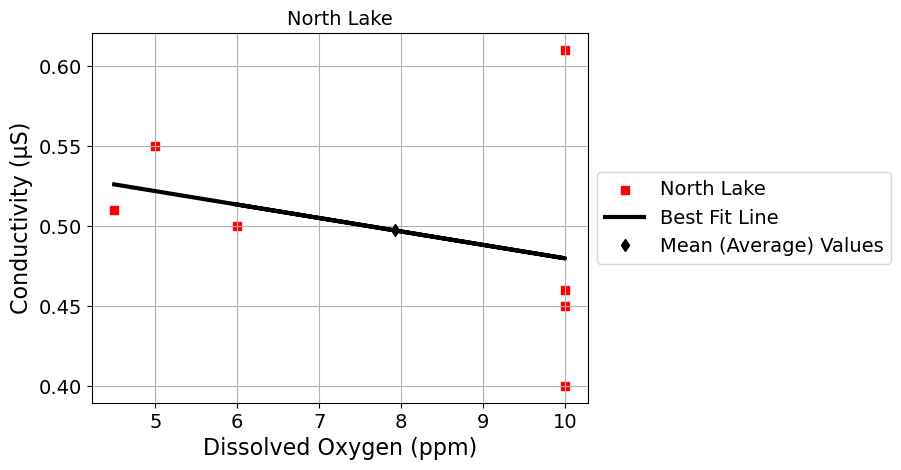

In [14]:
scatter_plot_with_linear_regression_by_lake('Dissolved Oxygen (ppm)', 'Conductivity (μS)')

### Alkalinity and Conductivity

slope = 0.001 Alkalinity (ppm) / Conductivity (μS)
intercept = 0.25 Conductivity (μS)
r = 0.27


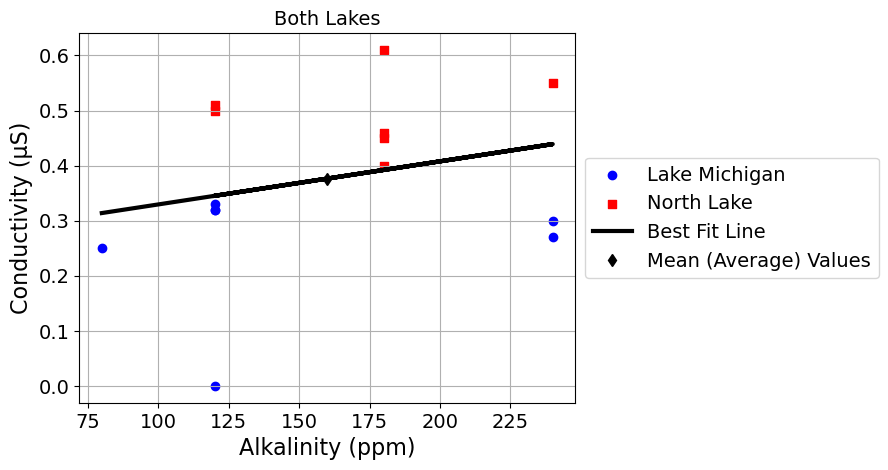

In [15]:
scatter_plot_with_linear_regression('Alkalinity (ppm)', 'Conductivity (μS)')

 ***  Lake Michigan  ***
slope = 0.0 Alkalinity (ppm) / Conductivity (μS)
intercept = 0.21 Conductivity (μS)
r = 0.16
 


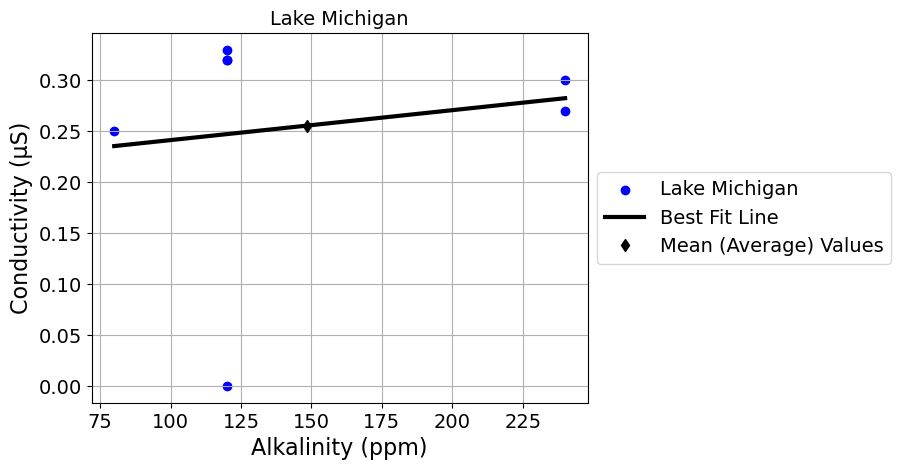

 ***  North Lake  ***
slope = 0.0 Alkalinity (ppm) / Conductivity (μS)
intercept = 0.46 Conductivity (μS)
r = 0.13
 


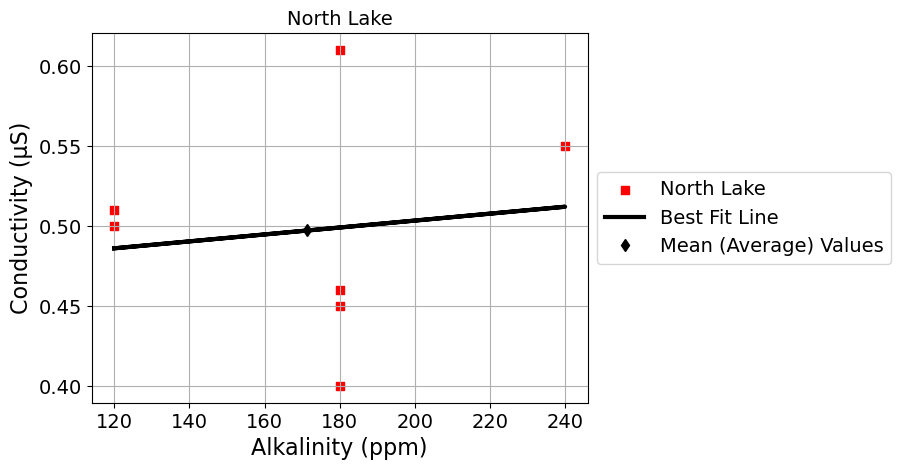

In [16]:
scatter_plot_with_linear_regression_by_lake('Alkalinity (ppm)', 'Conductivity (μS)')

### Alkalinity and Total Hardness

slope = 0.429 Alkalinity (ppm) / Total Hardness (ppm)
intercept = 77.73 Total Hardness (ppm)
r = 0.41


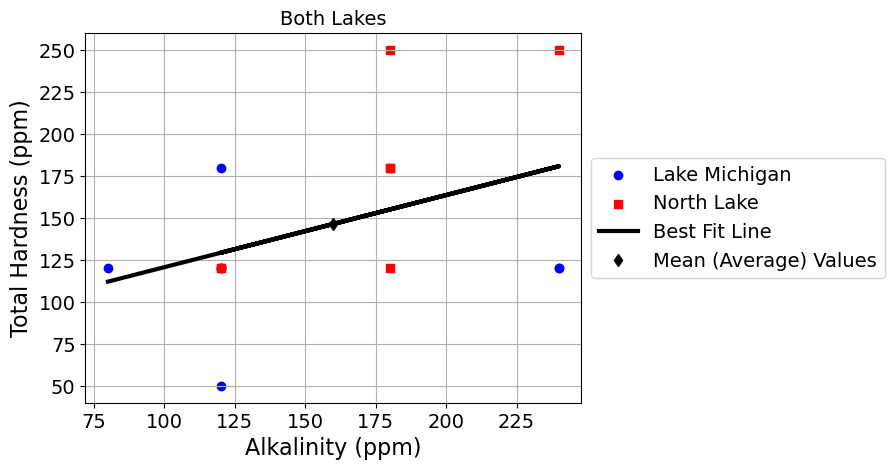

In [17]:
scatter_plot_with_linear_regression('Alkalinity (ppm)', 'Total Hardness (ppm)')

 ***  Lake Michigan  ***
slope = 0.012 Alkalinity (ppm) / Total Hardness (ppm)
intercept = 116.85 Total Hardness (ppm)
r = 0.02
 


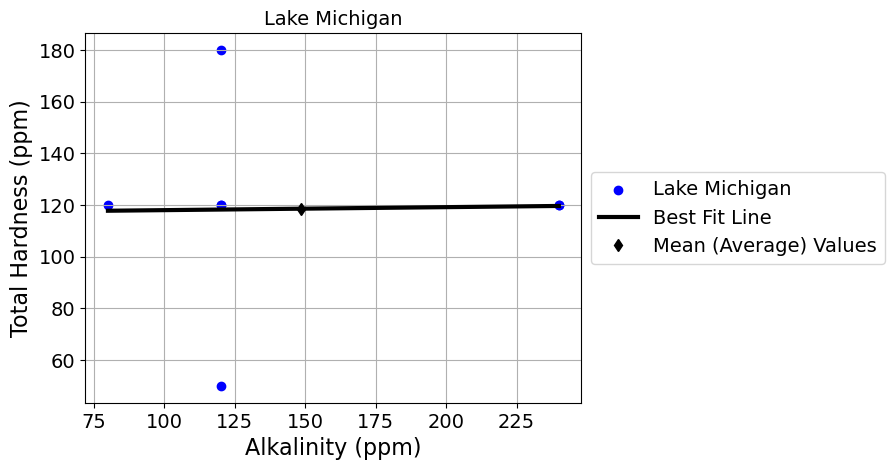

 ***  North Lake  ***
slope = 1.075 Alkalinity (ppm) / Total Hardness (ppm)
intercept = -10.0 Total Hardness (ppm)
r = 0.76
 


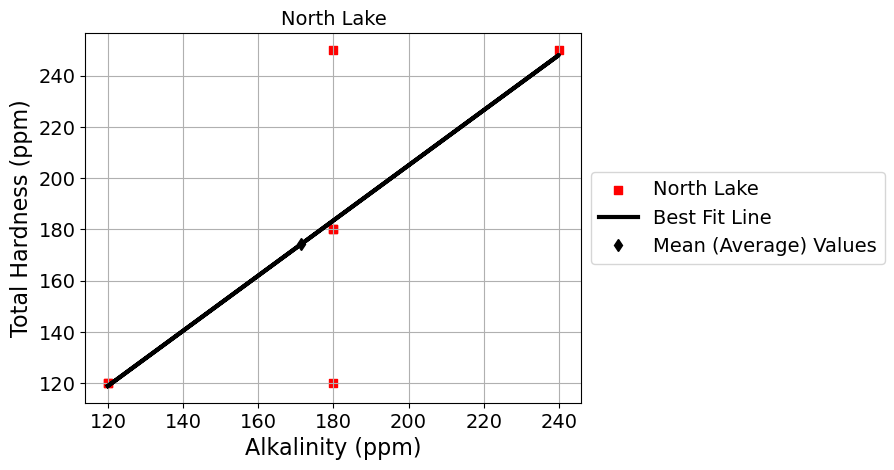

In [18]:
scatter_plot_with_linear_regression_by_lake('Alkalinity (ppm)', 'Total Hardness (ppm)')